In [ ]:
# Librerias

import numpy as np
import matplotlib.pyplot as plt

## 1. Transformada Rápida de Fourier para Señales Discretas

In [ ]:
# La siguiente función construye la matriz U de transformación.

def dftmatrix(N, Nfft):
  #construct DFT matrix
  k= np.arange(Nfft)
  if N is None: N = Nfft
  n = np.arange(N)
  U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
  return U/np.sqrt(Nfft)

 # Para calcular la transformada de Fourier de la señal x[n] se usa la siguiente expresión.

# X = U.H*x # donde U.H significa el complejo conjugado de la matriz U

## 2. Generación de Señales y Transformada de Fourier

In [ ]:
'''
1. Teniendo un sistema con fs = 2kHz, cree un vector tiempo de 0.8 segundos y genere las siguientes señales de
acuerdo con el último número de su cédula (C = 9).

Impares:
x1 = cos(2πf1t)
x2 = cos(2πf2t)
x3 = cos(2πf3t)
x4 = cos(2πf4t)

Teniendo:
f1 = (1 + C) ∗ 16
f2 = 3 ∗ C + 20 = 38
f3 = (3 + C) ∗ 50 − 90
f4 = 5 ∗ C + 80
'''

'\n1. Teniendo un sistema con fs = 2kHz, cree un vector tiempo de 0.8 segundos y genere las siguientes señales de\nacuerdo con el último número de su cédula (C = 9).\n\nImpares:\nx1 = cos(2πf1t)\nx2 = cos(2πf2t)\nx3 = cos(2πf3t)\nx4 = cos(2πf4t)\n\nTeniendo:\nf1 = (1 + C) ∗ 15 = 150\nf2 = 2 ∗ C + 20 = 38\nf3 = (2 + C) ∗ 50 − 90 = 460\nf4 = 4 ∗ C + 80 = 116\n'

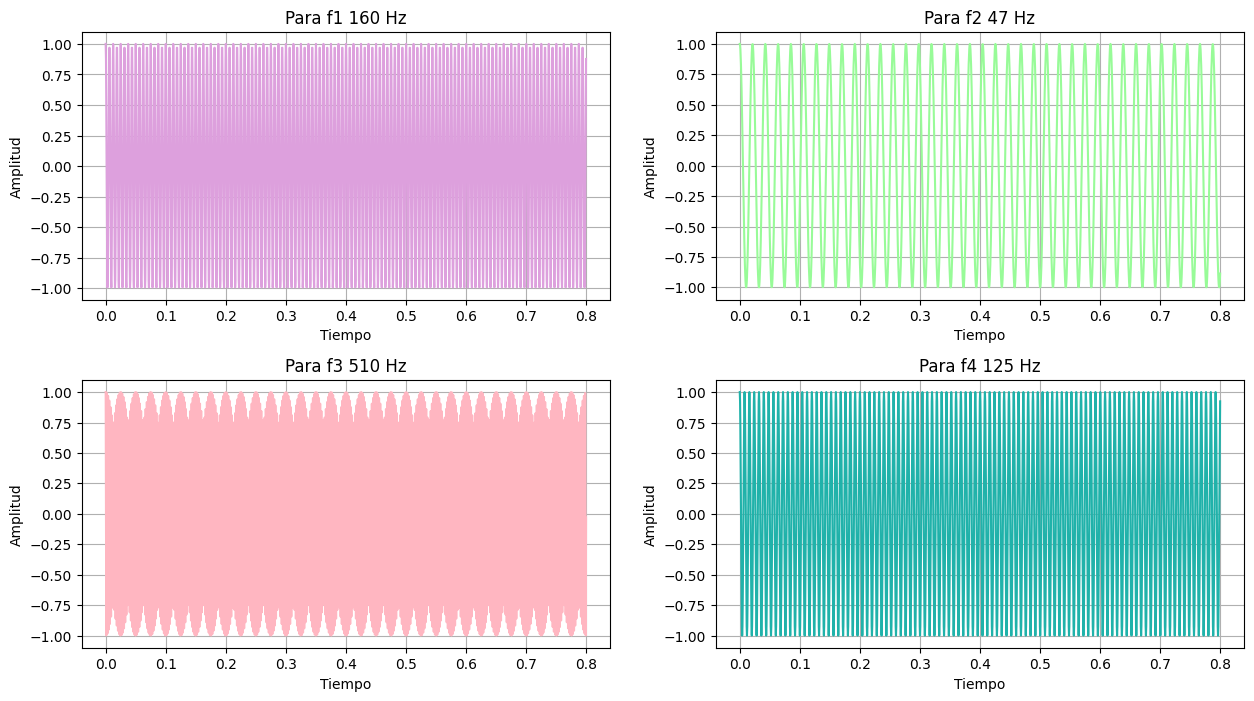

In [ ]:
'''
2. Grafique cada señal en una sola figura.
'''

fs = 2000
t = np.arange(0,0.8,1/fs)
C = 9

f1 = (1 + C) * 16
f2 = 3 * C + 20
f3 = (3 + C)*50 - 90
f4 = 5 * C + 80

# Señales
x1 = np.cos(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f2*t)
x3 = np.cos(2*np.pi*f3*t)
x4 = np.cos(2*np.pi*f4*t)

# Gráficas
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(t, x1, '#DDA0DD')
plt.title(f'Para f1 {f1} Hz')
plt.grid()

plt.subplots_adjust(hspace = 0.3)

plt.subplot(2, 2, 2)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(t, x2, '#98FB98')
plt.title(f'Para f2 {f2} Hz')
plt.grid()

plt.subplots_adjust(hspace = 0.3)

plt.subplot(2, 2, 3)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(t, x3, '#FFB6C1')
plt.title(f'Para f3 {f3} Hz')
plt.grid()

plt.subplots_adjust(hspace = 0.3)

plt.subplot(2, 2, 4)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.plot(t, x4, '#20B2AA')
plt.title(f'Para f4 {f4} Hz')
plt.grid()

plt.show()

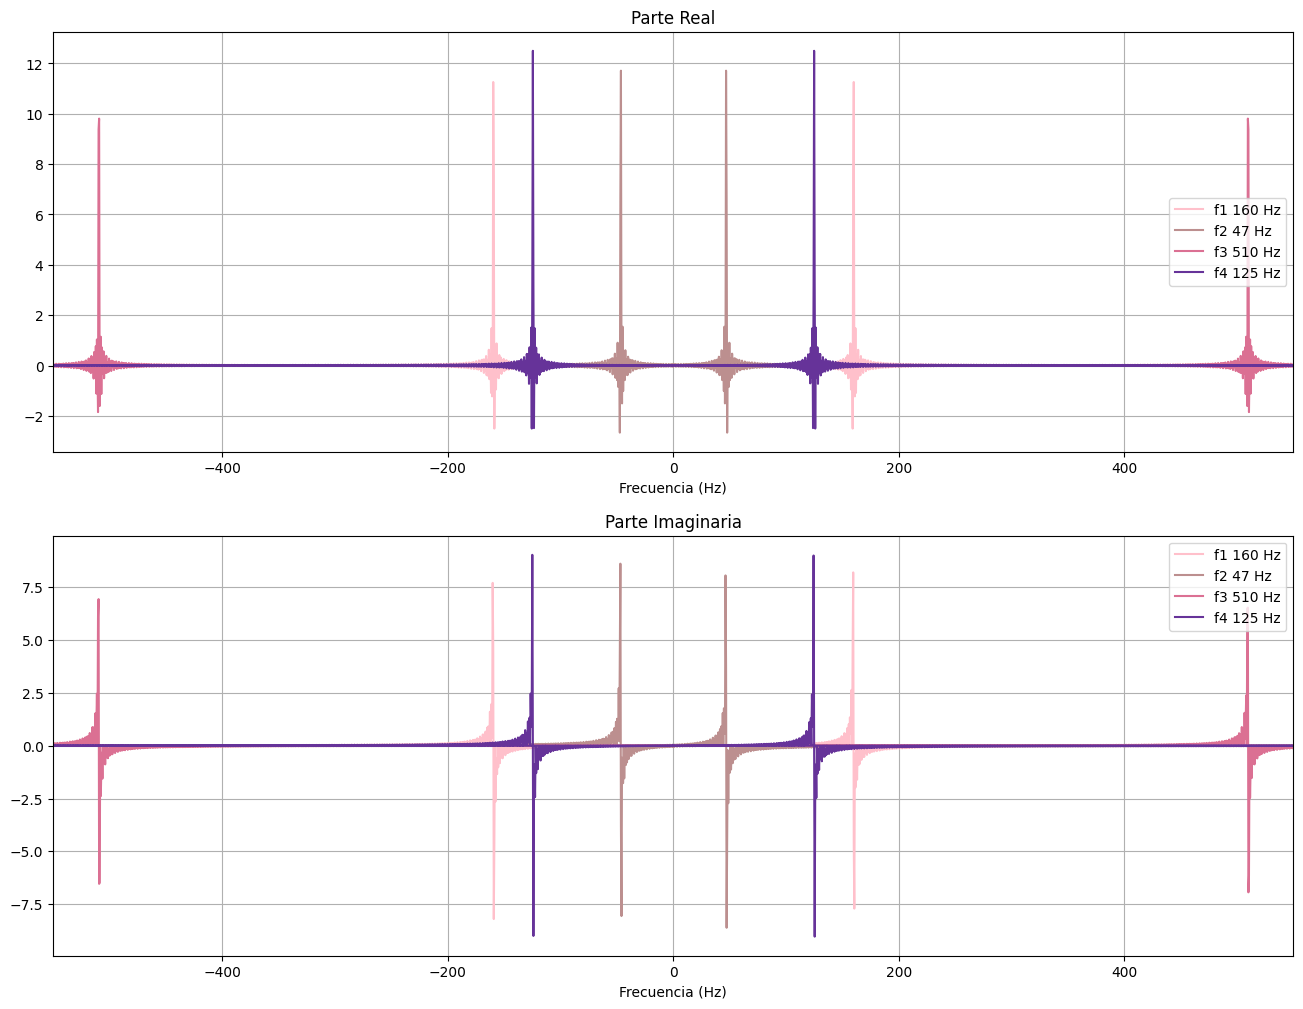

In [ ]:
'''
3. Calcule la Transformada de Fourier usando U y Nfft = 4096 para cada señal.
'''
Nfft = 4096 # Número de puntos de la transformada

# Le doy forma de columna a la función para que la matriz trabaje mejor con ella
x1.shape=(len(x1),1)
x2.shape=(len(x2),1)
x3.shape=(len(x3),1)
x4.shape=(len(x4),1)

U = dftmatrix(len(x1), Nfft) # Creo una única matriz de transformación

# Transformada de Fourier
XT1 = U.H*x1[:]
XT2 = U.H*x2[:]
XT3 = U.H*x3[:]
XT4 = U.H*x4[:]

'''
4. Usando subplots, grafique parte par e impar de la Transformada. ¿Qué se puede concluir al respecto?
'''

# Creo el arreglo de frecuencias normalizado
freq = np.hstack((np.arange(0, Nfft/2-1), np.arange(-Nfft/2, 1))) * fs / Nfft

# Gráficas
plt.figure(figsize=(16, 12))

plt.subplot(2,1,1)
plt.plot(freq, XT1.real, '#FFC0CB', freq, XT2.real, '#BC8F8F', freq, XT3.real, '#DB7093', freq, XT4.real, '#663399')
plt.title('Parte Real')
plt.xlabel('Frecuencia (Hz)')
plt.legend([f'f1 {f1} Hz', f'f2 {f2} Hz', f'f3 {f3} Hz', f'f4 {f4} Hz'])
plt.xlim(-550, 550)
plt.grid()

plt.subplots_adjust(hspace = 0.2)

plt.subplot(2,1,2)
plt.plot(freq, XT1.imag, '#FFC0CB', freq, XT2.imag,'#BC8F8F', freq, XT3.imag,'#DB7093', freq, XT4.imag, '#663399')
plt.title('Parte Imaginaria')
plt.legend([f'f1 {f1} Hz', f'f2 {f2} Hz', f'f3 {f3} Hz', f'f4 {f4} Hz'])
plt.xlabel('Frecuencia (Hz)')
plt.xlim(-550, 550)
plt.grid()


plt.show()


- Aparecen los picos en cada frecuencia fundamental para cada señal, que se disminuyen en amplitud al tener menor potencia.

- El coseno es una señal par, por lo que la parte real de su transformada de Fourier será también una función par, mientras que la parte imaginaría será una función impar.

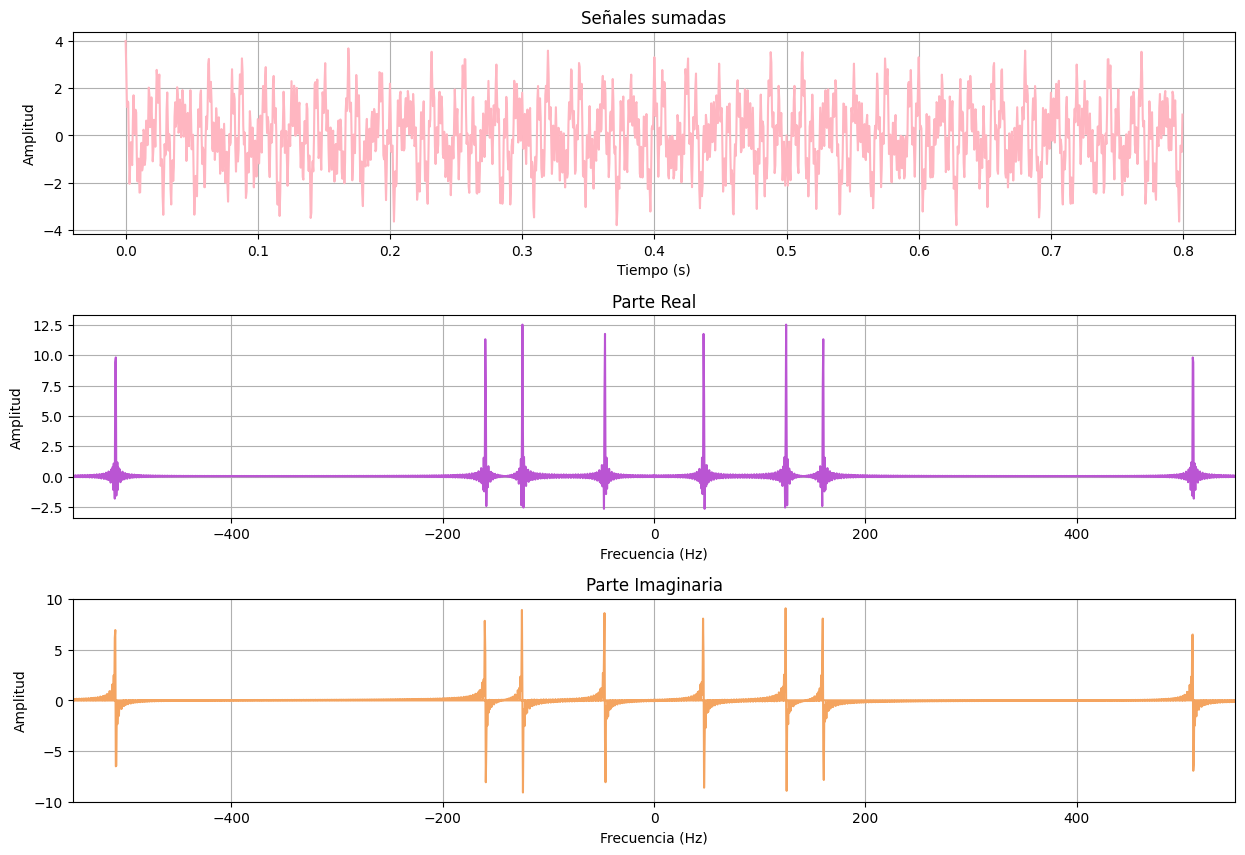

In [ ]:
'''
5. Calcule la señal xt = x1 + x2 + x3 + x4
6. Grafique la la señal en el tiempo, parte par y parte impar de la Transformada. ¿Qué se puede concluir?
'''

# Señal xt
xt = x1 + x2 + x3 + x4

# Transformada de Fourier
XT = U.H*xt[:]

# Gráficas
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(t, xt, '#FFB6C1')
axs[0].set_title('Señales sumadas')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

fig.subplots_adjust(hspace = 0.4)

axs[1].plot(freq, XT.real, '#BA55D3')
axs[1].set_title('Parte Real')
axs[1].set_xlim([-550, 550])
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

fig.subplots_adjust(hspace = 0.4)

axs[2].plot(freq, XT.imag, '#F4A460')
axs[2].set_title('Parte Imaginaria')
axs[2].set_xlim([-550, 550])
axs[2].set_xlabel('Frecuencia (Hz)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()



El espectro tanto en su parte real como imaginaria es idéntico al de las cuatro señales presentadas de forma independiente, se presenta una paridad de los picos respecto a su centro en la parte real, en la parte imaginaria hay una imparidad respecto al eje y, debido a la linealidad de la transformada de Fourier.

In [ ]:
'''
7. A dos de las cuatro señales, agreguele un offset de fase. Ejemplo:

x2 = np.cos(2*np.pi*f2*t - np.pi)
'''

# Señales
x1 = np.cos(2*np.pi*f1*t - np.pi) # señal desfasada pi
x2 = np.cos(2*np.pi*f2*t)
x3 = np.cos(2*np.pi*f3*t)
x4 = np.cos(2*np.pi*f4*t - np.pi) # señal desfasada pi

x1.shape=(len(x1),1)
x4.shape=(len(x4),1)

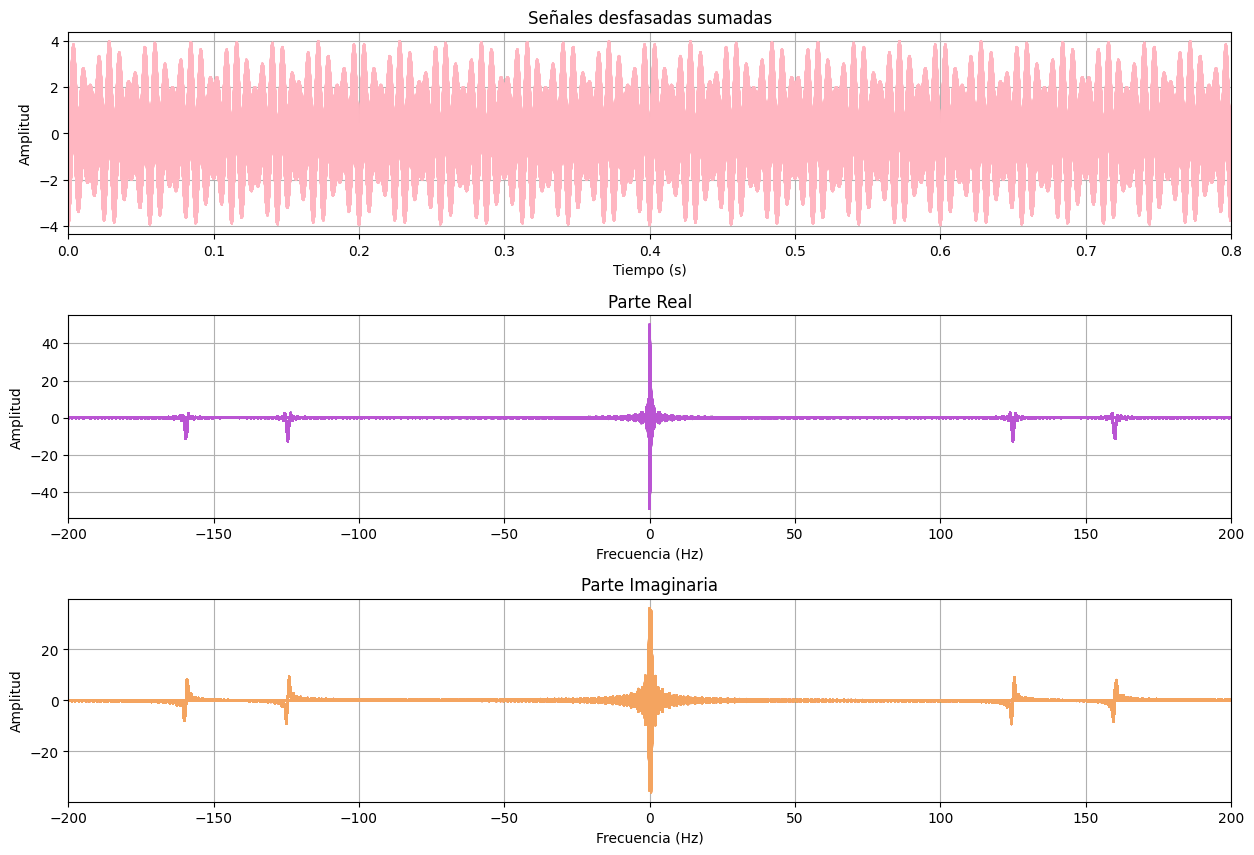

In [ ]:
'''
8. Repita el paso 5 y 6 con la nueva señal.
'''

# Señales sumadas desfasadas
xt2 = x1 + x2 + x3 + x4

# Transformada de Fourier
XT2 = U.H*xt2[:]

# Creo el arreglo de frecuencias normalizado
freq = np.hstack((np.arange(0, Nfft/2-1), np.arange(-Nfft/2, 1))) * fs / Nfft

# Gráficas
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(t, xt2, '#FFB6C1')
axs[0].set_title('Señales desfasadas sumadas')
axs[0].set_xlim([0, 0.8])
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

fig.subplots_adjust(hspace = 0.4)

axs[1].plot(freq, XT2.real, '#BA55D3')
axs[1].set_title('Parte Real')
axs[1].set_xlim([-200, 200])
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

fig.subplots_adjust(hspace = 0.4)

axs[2].plot(freq, XT2.imag, '#F4A460')
axs[2].set_title('Parte Imaginaria')
axs[2].set_xlim([-200, 200])
axs[2].set_xlabel('Frecuencia (Hz)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()


Las componentes espectrales de x1 y x4 (160 Hz, 125 Hz) son las únicas mostradas en espectro de frecuencia.

Se mantiene lap paridad en la componente real del espectro y la imparidad en la parte imaginaria.

Al tener solo las contribuciones de x1 y x4, la señal en el tiempo presentará un patrón más claro y se podrá observar la paridad característica de la función coseno que no se observaba antes de desfasar a x1 y x4.

## 3.  Recuperación de la Señal a partir de su Transformada

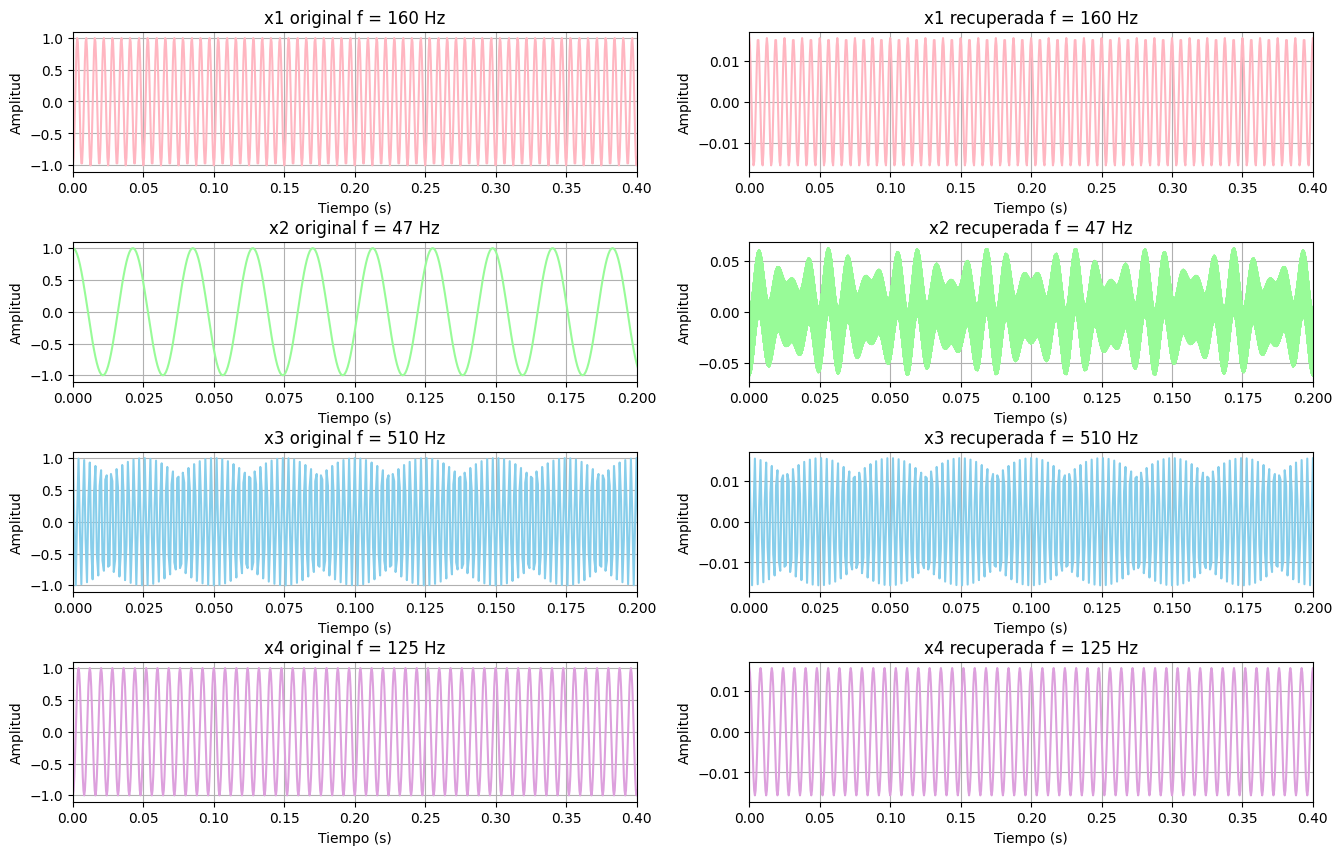

In [ ]:
'''
1. Use la siguiente instrucción para calcular la transformada inversa en cada uno de los casos del ítem anterior.

inversa=np.fft.ifft(Xf.T)
#Xf: Frequency-domain signal
'''
x1_inv = np.fft.ifft(XT1.T)
x2_inv = np.fft.ifft(XT2.T)
x3_inv = np.fft.ifft(XT3.T)
x4_inv = np.fft.ifft(XT4.T)


'''
2. Grafique los resultados usando subplots y comparelos.
¿Puede observar alguna diferencia?,
¿a qué se debe esto?
'''

fig, axs = plt.subplots(4, 2, figsize=(16, 10))

axs[0][0].plot(t, x1, '#FFB6C1')
axs[0][0].set_title(f'x1 original f = {f1} Hz')
axs[0][0].set_xlabel('Tiempo (s)')
axs[0][0].set_ylabel('Amplitud')
axs[0][0].set_xlim([0, 0.4])
axs[0][0].grid()

axs[0][1].plot(t,x1_inv.T.real[0:1600], '#FFB6C1')
axs[0][1].set_title(f'x1 recuperada f = {f1} Hz')
axs[0][1].set_xlabel('Tiempo (s)')
axs[0][1].set_ylabel('Amplitud')
axs[0][1].set_xlim([0, 0.4])
axs[0][1].grid()

fig.subplots_adjust(hspace = 0.5)

axs[1][0].plot(t, x2, '#98FB98')
axs[1][0].set_title(f'x2 original f = {f2} Hz')
axs[1][0].set_xlabel('Tiempo (s)')
axs[1][0].set_ylabel('Amplitud')
axs[1][0].set_xlim([0, 0.2])
axs[1][0].grid()

axs[1][1].plot(t,x2_inv.T.real[0:1600],'#98FB98')
axs[1][1].set_title(f'x2 recuperada f = {f2} Hz')
axs[1][1].set_xlabel('Tiempo (s)')
axs[1][1].set_ylabel('Amplitud')
axs[1][1].set_xlim([0, 0.2])
axs[1][1].grid()

fig.subplots_adjust(hspace = 0.5)

axs[2][0].plot(t, x3, '#87CEEB')
axs[2][0].set_title(f'x3 original f = {f3} Hz')
axs[2][0].set_xlabel('Tiempo (s)')
axs[2][0].set_ylabel('Amplitud')
axs[2][0].set_xlim([0, 0.2])
axs[2][0].grid()

axs[2][1].plot(t,x3_inv.T.real[0:1600],'#87CEEB')
axs[2][1].set_title(f'x3 recuperada f = {f3} Hz')
axs[2][1].set_xlabel('Tiempo (s)')
axs[2][1].set_ylabel('Amplitud')
axs[2][1].set_xlim([0, 0.2])
axs[2][1].grid()

fig.subplots_adjust(hspace = 0.5)

axs[3][0].plot(t, x4, '#DDA0DD')
axs[3][0].set_title(f'x4 original f = {f4} Hz')
axs[3][0].set_xlabel('Tiempo (s)')
axs[3][0].set_ylabel('Amplitud')
axs[3][0].set_xlim([0, 0.4])
axs[3][0].grid()

axs[3][1].plot(t, x4_inv.T.real[0:1600], '#DDA0DD')
axs[3][1].set_title(f'x4 recuperada f = {f4} Hz')
axs[3][1].set_xlabel('Tiempo (s)')
axs[3][1].set_ylabel('Amplitud')
axs[3][1].set_xlim([0, 0.4])
axs[3][1].grid()


Las señales recuperadas perfectamente fueron x1 (f = 160 Hz), x3 (f = 510 Hz) y x4 (f = 125 Hz), x2 (f = 47 Hz) no fue recuperada con tanta fidelidad debido a su baja componente de frecuencia.

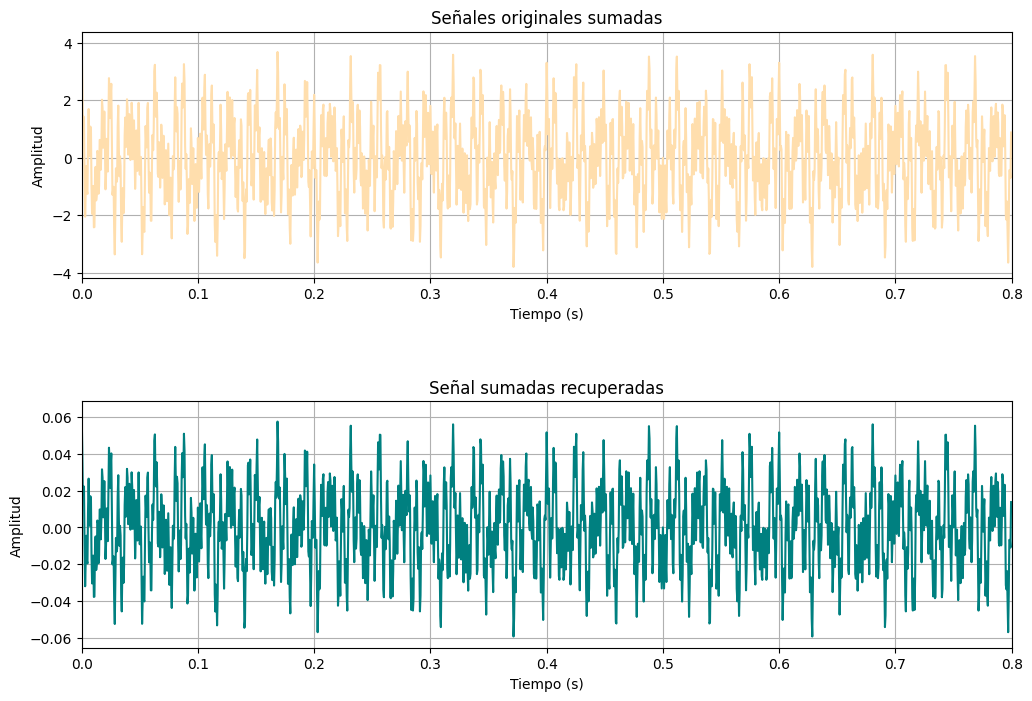

In [ ]:
# Recuperar señales sumadas sin desfase

# Señales originales
x1 = np.cos(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f2*t)
x3 = np.cos(2*np.pi*f3*t)
x4 = np.cos(2*np.pi*f4*t)

x1.shape=(len(x1),1)
x2.shape=(len(x2),1)
x3.shape=(len(x3),1)
x4.shape=(len(x4),1)

# Señal xt
xt = x1 + x2 + x3 + x4

# Transformada de Fourier
XT = U.H*xt[:]

# Transformada Inversa
xt_inv =np.fft.ifft(XT.T)

# Gráficas
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, xt, '#FFDEAD')
plt.title('Señales originales sumadas')
plt.xlim(0, 0.8)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 1, 2)
plt.plot(t,xt_inv.T.real[0:1600], '#008080')
plt.title('Señal sumadas recuperadas')
plt.xlim(0, 0.8)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.show()

La señal producto de la suma de las cuatro señales originales es totalmente semejante a la original, se recuperó totalmente.

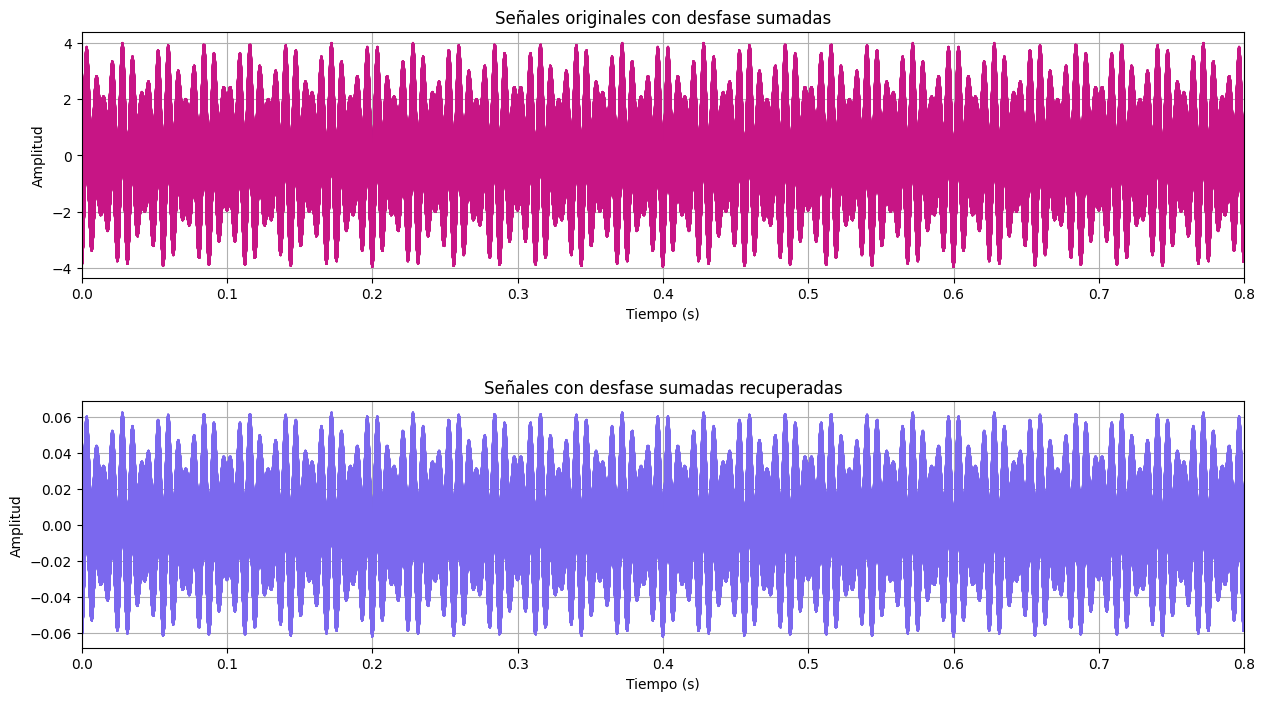

In [ ]:
# Recuperar señales sumadas con desfase

# Señales
x1 = np.cos(2*np.pi*f1*t - np.pi) # señal desfasada pi
x2 = np.cos(2*np.pi*f2*t)
x3 = np.cos(2*np.pi*f3*t)
x4 = np.cos(2*np.pi*f4*t - np.pi) # señal desfasada pi

x1.shape=(len(x1),1)
x4.shape=(len(x4),1)

# Señales sumadas con desfase
xt2 = x1 + x2 + x3 + x4

# Transformada de Fourier
XT2 = U.H*xt2[:]

# Transformada Inversa
x2_inv =np.fft.ifft(XT2.T)

# Gráficas
plt.figure(figsize=(15, 8))  # Tamaño de la figura

plt.subplot(2, 1, 1)
plt.plot(t, xt2, '#C71585')
plt.title('Señales originales con desfase sumadas')
plt.xlim(0, 0.8)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.subplots_adjust(hspace = 0.5)

plt.subplot(2, 1, 2)  # Subplot 2
plt.plot(t,x2_inv.T.real[0:1600],'#7B68EE')
plt.title('Señales con desfase sumadas recuperadas')
plt.xlim(0, 0.8)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.show()

En este caso, también se observa una recuperación total de la señal a través de la transformada inversa de Fourier.

## 4. Conclusiones

- El espectro de una señal sinusoidal se caracteriza por tener picos en las frecuencias fundamentales de cada componente.

- La paridad de una señal tiene un impacto específico en la disposición de sus partes real e imaginaria en el espectro, ya que, si la señal es par, su parte real en el espectro será también par y la parte imaginaria será impar. Por otro lado, si la señal es impar, su parte real será impar y su parte imaginaria será par en el espectro.

- La FFT preserva la información de la señal original, ya que es una transformación invertible, y la señal recuperada conserva o incluso puede extender la longitud de la señal original. Por lo que, con suficientes puntos de muestreo, es posible reconstruir completamente la señal original.

- La linealidad en la trasformada de Fourier permite aplicarla a cada componente de una señal por separado y luego combinarlas, obteniendo el mismo resultado que si se sumaran las señales primero y luego se aplicara la transformada.